# Analisis exploratorio de datos con dataset con informacion sobre casos positivos y negativos de sindrome de ovario poliquistico
## El dataset original detalla muchas variables (42) por lo que se considero utilizar uno reducido, el cual ya venia adjunto en el paquete de kaggle

## Primeramente cargamos las librerias a utilizar

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sea

## Cargamos el dataset y lo llamamos para visualizarlo

In [2]:
PCO = pd.read_csv('Documents/PCO/PCOS_infertility.csv')# encoding='latin-1') 
PCO

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


## Podemos observar que los titulos de las columnas llevan simbolos lo que dificulta trabajar con ellos ya que ciertas funciones no los detectan por lo que habra que modificarlos 

In [3]:
PCO = PCO.rename(columns=lambda x: x.replace(' ', ''))
PCO.rename(columns={'SINo': 'nueva_columna'}, inplace=True)
PCO

,Sl.No,PatientFileNo.,PCOS(Y/N),Ibeta-HCG(mIU/mL),IIbeta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


In [4]:
PCO = PCO.rename(columns=lambda x: x.replace('.', ''))
PCO = PCO.rename(columns=lambda x: x.replace('/', '_'))
PCO = PCO.rename(columns=lambda x: x.replace('-', '__'))
PCO = PCO.rename(columns=lambda x: x.replace('(', '_'))
PCO = PCO.rename(columns=lambda x: x.replace(')', '_'))
PCO = PCO.rename(columns=lambda x: x.replace('9', '')) #AQui quite un 9 que puse por error 
PCO#rename(columns={'SINo': 'ID'})         #La columna SINo no se renombraba o eliminaba pero porque no es una i, es una l

,SlNo,PatientFileNo,PCOS_Y_N_,Ibeta__HCG_mIU_mL_,IIbeta__HCG_mIU_mL_,AMH_ng_mL_
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


## Para comenzar el analisis utilizamos un pairplot para encontrar diferencias y posibles variables con relaciones 

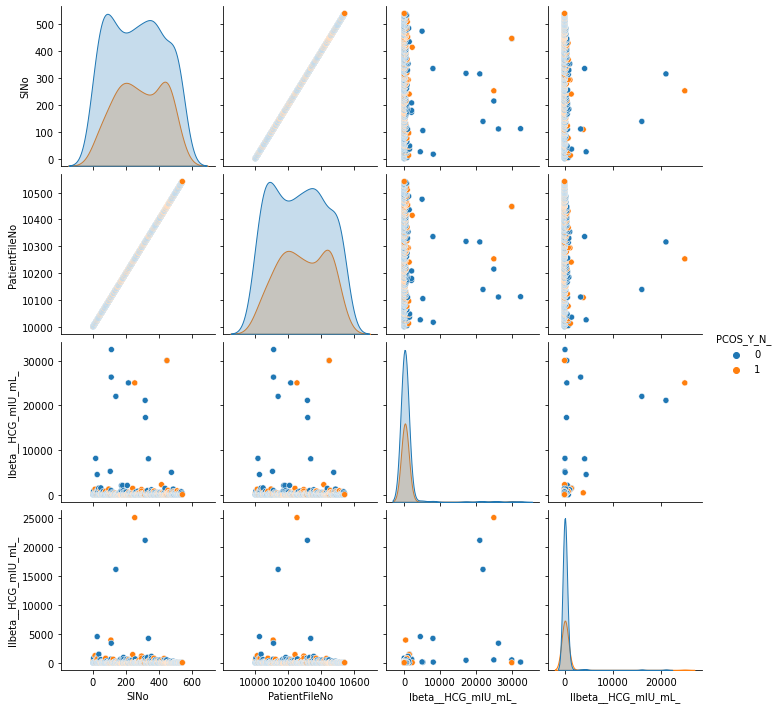

In [8]:

sea.pairplot(PCO, hue = 'PCOS_Y_N_')

### Se utilizo PCOSYN_ ya que este variable categorica indica los casos positivos y negativos. Podemos observar en el grafico que la enzima beta-HGC se ve disminuida en los pacientes con sindrome de ovario poliquistico.

In [9]:
PCOF = PCO.drop(columns=["SlNo", "PatientFileNo"])
PCOF

,PCOS_Y_N_,Ibeta__HCG_mIU_mL_,IIbeta__HCG_mIU_mL_,AMH_ng_mL_
0,0,1.99,1.99,2.07
1,0,60.80,1.99,1.53
2,1,494.08,494.08,6.63
3,0,1.99,1.99,1.22
4,0,801.45,801.45,2.26
...,...,...,...,...
536,0,1.99,1.99,1.7
537,0,80.13,1.99,5.6
538,0,1.99,1.99,3.7
539,0,292.92,1.99,5.2


## Se retira la columna que indica el file del paciente ya que no nos es relevante si por ejemplo, queremos generar un modelo de IA o una regresion

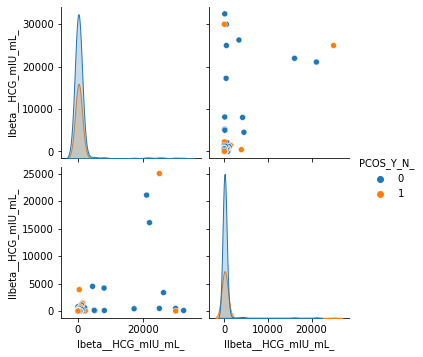

In [10]:
sea.pairplot(PCOF, hue = 'PCOS_Y_N_')

### El plot se simplifica, ahora analizaremos los datos de pacientes positivos y negativos por separado. 

In [11]:
Pos = PCOF[PCOF['PCOS_Y_N_'] == 1] 
resumen = Pos.describe()
resumen

,PCOS_Y_N_,Ibeta__HCG_mIU_mL_,IIbeta__HCG_mIU_mL_
count,177.0,177.000000,177.000000
mean,1.0,532.042537,267.543613
std,0.0,2922.864267,1905.709760
min,1.0,1.920000,0.110417
25%,1.0,1.990000,1.990000
50%,1.0,70.530000,1.990000
75%,1.0,346.590000,99.690000
max,1.0,30007.000000,25000.000000


In [12]:
neg = PCOF[PCOF['PCOS_Y_N_'] == 0] 
neg


,PCOS_Y_N_,Ibeta__HCG_mIU_mL_,IIbeta__HCG_mIU_mL_,AMH_ng_mL_
0,0,1.99,1.99,2.07
1,0,60.80,1.99,1.53
3,0,1.99,1.99,1.22
4,0,801.45,801.45,2.26
5,0,237.97,1.99,6.74
...,...,...,...,...
535,0,1.99,1.99,7.6
536,0,1.99,1.99,1.7
537,0,80.13,1.99,5.6
538,0,1.99,1.99,3.7


## Para observar mejor y confirmar las vizualizaciones, podemos hacer un resumen de cada estadistca de ambos dataframes 

In [13]:
resumen = Pos.describe()
resumen

,PCOS_Y_N_,Ibeta__HCG_mIU_mL_,IIbeta__HCG_mIU_mL_
count,177.0,177.000000,177.000000
mean,1.0,532.042537,267.543613
std,0.0,2922.864267,1905.709760
min,1.0,1.920000,0.110417
25%,1.0,1.990000,1.990000
50%,1.0,70.530000,1.990000
75%,1.0,346.590000,99.690000
max,1.0,30007.000000,25000.000000


In [14]:
resumen = neg.describe()
resumen

,PCOS_Y_N_,Ibeta__HCG_mIU_mL_,IIbeta__HCG_mIU_mL_
count,364.0,364.000000,364.000000
mean,0.0,728.982437,223.975137
std,0.0,3539.635651,1437.024331
min,0.0,1.300000,0.990000
25%,0.0,1.990000,1.990000
50%,0.0,13.735000,1.990000
75%,0.0,273.950000,93.070000
max,0.0,32460.970000,21084.210000


## Conclusión

### En general observamos que los casos negativos son poco mas del doble de los positivos. Tambien observamos que el promedio de la concentración de la enzima I B-HCG es mas alto en los casos negativos y en los positivos, la II B-HGC es mayor. En este caso podemos ver que llegamos a dos conclusiones contrarias, dandonos cuenta que posiblemente se requiere un ajuste o eliminación de datos atipicos dada la cantidad desigual de ambos (posistivos y negativos). Tambien podemos decir que estas variables quiza no serian suficientes para determinar la prescencia de esta enfermedad por lo que habran de tomarme diferentes medidas en el filtrado y preparacion de datos. 